# Gradient Descent (GD)
# Stochastic Gradient Descent (SGD)
# Mini-Batch Gradient Descent (mini-batch SGD)

## Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## GD, SGD and mini-batch SGD

<div class="alert alert-block alert-info">
    
Given a dataset $S$, the 
- **Gradient Descent (GD)**
- **Stochastic Gradient Descent (SGD)** and
- **Mini-Batch Stochasticv Gradient Descent (mini-batch SGD)**
    
algorithms are given as follows:

<img src="files/figures/GD_2.png" width="650px"/>
    
<img src="files/figures/SGD.png" width="650px"/>
    
<img src="files/figures/SGD_miniBatch.png" width="650px"/>

</div>

We are going to draw a set of $N = 500$ **random points on the surface** $z = f(x, y)$ and add to them some **uniform noise**, as illustrated below.

<img src="files/figures/surface.png" width="400px"/>

More precisely:
- Draw a set of $N = 500$ **triplets** of the form
$$S = \Big\{ \big( x_i, y_i, f(x_i, y_i) + \epsilon \big) : x_i, y_i \in [-5, 5], \epsilon \sim \mathcal{U} \big( [-1,1] \big) \text{ and } i = 1, \dots, N \Big\}$$
where:
    - $x_i, y_i $ are sampled uniformly inside $[-5, 5]$;
    - $f(x_i, y_i) = \cos(x_i) \cdot \cos(y_i) + \frac{1}{10} \cdot x_i^2 + \frac{1}{20} \cdot y_i^2$ is the surface equation;
    - $\epsilon \sim \mathcal{U} \big( [-1,1] \big)$ is a uniform noise.
- Store these points into a numpy tensor `train_set` of size $N \times 3$.
- Represent these points together with the surface $z = f(x, y)$ in a 3D plot (`plt.scatter()`).

In [3]:
N = 500

def f(x, y):
    return np.cos(x)*np.cos(y) + 1/10 * x**2 + 1/20 * y**2

train_set = np.zeros(shape=(N, 3))

for i in range(N):
    
    x_i = np.random.uniform(-5, 5, 1).item()
    y_i = np.random.uniform(-5, 5, 1).item()
    z_i = f(x_i, y_i) + np.random.uniform(-1, 1, 1).item()
    
    train_set[i, :] = np.array([x_i, y_i, z_i])

In [4]:
train_set.shape

(500, 3)

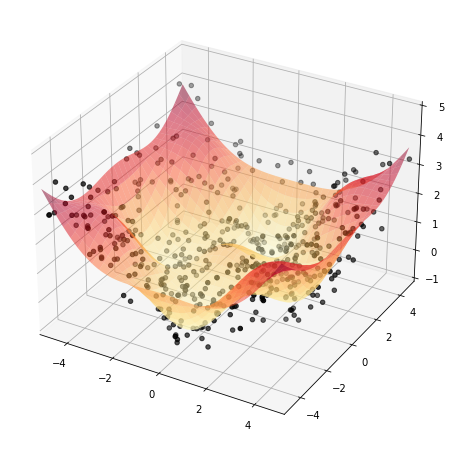

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.arange(-5.0, 5.0, 0.1)

X, Y = np.meshgrid(x, y)
Z = np.cos(X)*np.cos(Y) + 1/10 * X**2 + 1/20 * Y**2

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection= '3d')
surf = ax.plot_surface(X, Y, Z, 
                       cmap='YlOrRd', 
                       linewidth=0, 
                       antialiased='True', 
                       rstride=3, 
                       cstride=3, 
                       alpha=0.5
                      )

# points
points = ax.scatter(train_set[:, 0], train_set[:, 1], train_set[:, 2],
                    color = 'black',
                    marker="o"
                   )

ax.set_xlim([-5.0, 5.0])
ax.set_ylim([-5.0, 5.0])
ax.set_zlim([-1.0, 5.0])
# plt.title("Surface Plot", size=14)

plt.show()

<div class="alert alert-block alert-info">

Consider the **quadratic model** given by

$$
\hat f \left( x, y; \Theta \right) = \omega_0 x^4 + \omega_1 x^3y + \omega_2 x^2y^2 + \omega_3 x y^3 + \omega_4 y^4 + \omega_5
$$

where $\Theta = (w_0, w_1, w_2, w_3, w_4, w_5)$ are the **parameters** of the model. Obviously, different parameters $\Theta$ give rise to different models $\hat f(\cdot, \cdot; \boldsymbol{\Theta})$.

<br>    
    
Let $\hat f(\cdot, \cdot; \Theta)$ be a **model**, $B = \big\{ (x_i, y_i, z_i) : i = 1, \dots, K \big\}$ be a **batch of points** and $p_i = (x_i, y_i, z_i) \in B$ be a **point**:
- The **prediction** for $(x_i, y_i)$ by $\hat f$ is $\hat f(x_i, y_i; \Theta)$.
- The **(real) target** of $(x_i, y_i)$ is $z_i= \cos(x_i) \cdot \cos(y_i) + \frac{1}{10} \cdot x_i^2 + \frac{1}{20} \cdot y_i^2$.
- The **individual loss** for $p_i$ is the distance between the target and the prediction
    
$$
\ell \left( z_i , \hat f(x_i, y_i; \Theta) \right) = \frac{1}{2} \left( z_i - \hat f(x_i, y_i; \Theta) \right)^2.
$$
    
- The **collective loss** for $B$ is the distance between all targets and predictions
    
$$
\mathcal{L} \left( z_1, \dots, z_K , \hat f(x_1, y_1; \Theta), \dots, \hat f(x_N, y_K; \Theta) \right) = \frac{1}{2K} \sum_{i=1}^K \left( z_i - \hat f(x_i, y_i; \Theta) \right)^2.
$$

</div>

- Write a function<br>
`hat_f(x, y, theta)`<br>
that implements the **model** $\hat f(x, y; \Theta)$.
- Write a function<br> 
`small_loss(x_i, y_i, z_i, theta)`<br>
that implements the **individual loss** $\ell \left( z_i , \hat f(x_i, y_i; \Theta) \right)$, where `x_i`,`y_i` and `z_i` are values.
- Write a function<br>
`big_loss(x_t, y_t, z_t, theta)`<br>
that implements the **collective loss** $\mathcal{L} \left( z_1, \dots, z_K , \hat f(x_1, y_1; \Theta), \dots, \hat f(x_N, y_K; \Theta) \right)$, where `x_t`,`y_t` and `z_t` are tensors of values.

In [6]:
def hat_f(x, y, theta):
    
    w0, w1, w2, w3, w4, w5 = theta
    x4 = x**4
    x3y = x**3 * y
    x2y2 = x**2 * y**2
    xy3 = x * y**3
    y4 = y**4
    
    return w0*x4 + w1*x3y + w2*x2y2 + w3*xy3 + w4*y4 + w5

In [7]:
theta = (1, 1, 1, 1, 1, 1)

print(hat_f(2.3, -1.6, theta))
# print(hat_f(2.3 * np.ones(500), -1.6 * np.ones(500), theta))

20.192099999999993


In [8]:
def small_loss(x_i, y_i, z_i, theta):
    "Individual loss (scalar)"
    
    pred_i = hat_f(x_i, y_i, theta)
    
    return 1/2 * np.square(pred_i - z_i)

In [9]:
def big_loss(x_t, y_t, z_t, theta):
    "Collective loss (scalar)"
    
    loss = 0
    
    for i in range(len(x_t)): # should be broadcastable
        
        x_i, y_i, z_i = x_t[i], y_t[i], z_t[i]
        loss += small_loss(x_i, y_i, z_i, theta)
    
    loss /= len(x_t)
    
    return loss.item()

In [10]:
small_loss(2.3, -1.6, 3.7, theta)

135.9946812049999

In [11]:
big_loss(2.3 * np.ones(500), -1.6 * np.ones(500), 3.7 * np.ones(500), theta)

135.99468120499859

<div class="alert alert-block alert-info">
    
We have

\begin{align}
\nabla \ell(x_i, y_i, z_i; \Theta) & =
\frac{\partial \left[ \frac{1}{2} \left( z_i - \hat f(x_i, y_i; \Theta) \right)^2 \right]}{\partial \Theta} \\
& =
- \left( z_i - \hat f(x_i, y_i; \Theta) \right) \cdot \frac{\partial \hat f(x_i, y_i; \Theta)}{\partial \Theta}
\end{align}

and 

\begin{align}
\nabla \mathcal{L}(x_i, y_i, z_i; \Theta) & =
\frac{\partial \left[ \frac{1}{2K} \sum_{i=1}^K \left( z_i - \hat f(x_i, y_i; \Theta) \right)^2 \right]}{\partial \Theta} \\
& =
- \frac{1}{K} \sum_{i=1}^K \left( z_i - \hat f(x_i, y_i; \Theta) \right) \cdot \frac{\partial \hat f(x_i, y_i; \Theta)}{\partial \Theta}
\end{align}

</div>

- Write a function<br>
`grad_small_loss(x_i, y_i, z_i, theta)`<br>
that implements the **gradient of the individual loss** $\nabla \ell(x_i, y_i, z_i; \Theta)$
- Write a function<br>
`grad_big_loss(x_t, y_t, z_t, theta)`<br>
that implements the **gradient of the collective loss** $\nabla \mathcal{L}(\boldsymbol{x}, \boldsymbol{y}, \boldsymbol{z}; \Theta)$ as the sum of the gradients of the individual losses.

In [12]:
def grad_small_loss(x_i, y_i, z_i, theta):
    "Gradient of individual loss w.r.t. theta (vector)"
    
    x4 = x_i**4
    x3y = x_i**3 * y_i
    x2y2 = x_i**2 * y_i**2
    xy3 = x_i * y_i**3
    y4 = y_i**4
    
    tmp = -(z_i - hat_f(x_i, y_i, theta))
    nabla_0 = tmp * x4
    nabla_1 = tmp * x3y
    nabla_2 = tmp * x2y2
    nabla_3 = tmp * xy3
    nabla_4 = tmp * y4
    nabla_5 = tmp * 1
    
    return np.array([nabla_0, nabla_1, nabla_2, nabla_3, nabla_4, nabla_5])

In [13]:
def grad_big_loss(x_t, y_t, z_t, theta):
    "Gradient of collective losses w.r.t. theta (vector)"
    
    nabla = np.zeros(len(theta))
    
    for i in range(len(x_t)): # should be braodcastable
    
        x_i, y_i, z_i = x_t[i], y_t[i], z_t[i]
        nabla = nabla + grad_small_loss(x_i, y_i, z_i, theta)
    
    nabla /= len(x_t)
    
    return nabla

In [14]:
grad_small_loss(1.1, 2.2, 3.3, theta)

array([  63.08382311,  126.16764622,  252.33529244,  504.67058488,
       1009.34116976,   43.0871    ])

In [15]:
x_t = np.array([1.1, 1.1, 1.1])
y_t = np.array([2.2, 2.2, 2.2])
z_t = np.array([3.3, 3.3, 3.3])
grad_big_loss(x_t, y_t, z_t, theta)

array([  63.08382311,  126.16764622,  252.33529244,  504.67058488,
       1009.34116976,   43.0871    ])

Using your functions `grad_small_loss(...)` and `grad_big_loss(...)`, write the three following functions:

- `GD(dataset, lamda, nb_epochs)`<br>
    
    that implements the **gradient descent (GD)** algorithm.<br>
    Run this function with the parameters: `dataset=train_set`, `lamda=1e-5`, `nb_epochs=1000`.<br>
    Check the collective loss with the parameters `theta` that you obtain.<br><br>

- `SGD(dataset, lamda, nb_epochs)`<br>
    
    that implements the **stochastic gradient descent (SGD)** algorithm.<br>
    Run this function with the parameters: `dataset=train_set`, `lamda=1e-8`, `nb_epochs=1000`.<br>
    Check the collective loss with the parameters `theta` that you obtain.<br><br>
    
- `mini_SGD(dataset, batch_size, lamda, nb_epochs)`<br>
    
    that implements the **mini-batch stochastic gradient descent (mini-batch SGD)** algorithm.<br>
    Run this function with the parameters: `dataset=train_set`, `lamda=1e-8`, `nb_epochs=1000`, `batch_size=64`.
    Check the collective loss with the parameters `theta` that you obtain.<br><br>

In [16]:
def GD(dataset, lamda, nb_epochs):
        
    e = 0
    theta = np.random.normal(0, 1, size=6)
    gradient = 100 * np.ones(len(theta))
    
    while e < nb_epochs and np.linalg.norm(gradient) > 0.1:

        x_t = dataset[:, 0]
        y_t = dataset[:, 1]
        z_t = dataset[:, 2]
        gradient = grad_big_loss(x_t, y_t, z_t, theta)
        theta = theta - (lamda * gradient)
        e+=1
        
    return theta

In [17]:
def SGD(dataset, lamda, nb_epochs):
    
    e = 0
    theta = np.random.normal(0, 1, size=6)
    gradient = 100 * np.ones(len(theta))
    
    while e < nb_epochs and np.linalg.norm(gradient) > 0.1:

        for i in range(len(dataset)):

            x, y, z = dataset[i, :]
            gradient = grad_small_loss(x, y, z, theta)
            theta = theta - (lamda * gradient)
        
        e += 1
            
    return theta

In [18]:
def mini_SGD(dataset, lamda, nb_epochs, batch_size):
    
    e = 0
    theta = np.random.normal(0, 1, size=6)
    gradient = 100 * np.ones(len(theta))
    
    while e < nb_epochs and np.linalg.norm(gradient) > 0.1:
        
        for b in range(dataset.shape[0] // batch_size):
            
            bound_1, bound_2 = b*batch_size, (b+1)*batch_size
            x_t = dataset[bound_1:bound_2, 0]
            y_t = dataset[bound_1:bound_2, 1]
            z_t = dataset[bound_1:bound_2, 2]
            gradient = grad_big_loss(x_t, y_t, z_t, theta)
            theta = theta - (lamda * gradient)
        
        e += 1

    return theta

In [19]:
%time
# Global variables
dataset = train_set
lamda = 1e-5
nb_epochs = 1000

theta_GD = GD(dataset, lamda, nb_epochs)
big_loss(train_set[:, 0], train_set[:, 1], train_set[:, 2], theta_GD)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs


0.36379532098876

In [20]:
%time
# Global variables
dataset = train_set
lamda = 1e-8
nb_epochs = 1000

theta_SGD = SGD(dataset, lamda, nb_epochs)
big_loss(train_set[:, 0], train_set[:, 1], train_set[:, 2], theta_SGD)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.81 µs


1.2270343609394156

In [21]:
%time
# Global variables
dataset = train_set
lamda = 1e-5
nb_epochs = 1000
batch_size= 64

theta_mini_SGD = mini_SGD(dataset, lamda, nb_epochs, batch_size)
big_loss(train_set[:, 0], train_set[:, 1], train_set[:, 2], theta_mini_SGD)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs


4.0997914181225195

- Plot your **best model** $\hat f(\cdot, \cdot; \Theta)$ together with your **train set** by replacing the `your_parameters_theta`by the best parameters that you obtained in the code below.

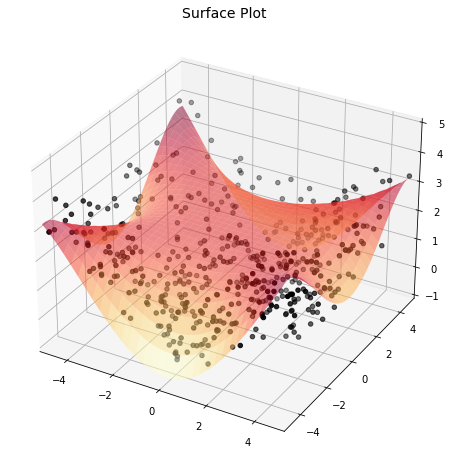

In [26]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.arange(-5.0, 5.0, 0.1)

X, Y = np.meshgrid(x, y)
# Z = hat_f(X, Y, your_parameters_theta)
Z = hat_f(X, Y, theta_SGD)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection= '3d')
surf = ax.plot_surface(X, Y, Z, 
                       cmap='YlOrRd', 
                       linewidth=0, 
                       antialiased='True', 
                       rstride=3, 
                       cstride=3, 
                       alpha=0.5
                      )

# points
points = ax.scatter(train_set[:, 0], train_set[:, 1], train_set[:, 2],
                    color = 'black',
                    marker="o"
                   )

ax.set_xlim([-5.0, 5.0])
ax.set_ylim([-5.0, 5.0])
ax.set_zlim([-1.0, 5.0])
plt.title("Surface Plot", size=14)

plt.show()